## Лабораторна робота 2 
## Згенерувати N (наприклад, 50) тривимірних незалежних векторів, в яких всі координати незалежні, перші дві показниково розподілені з параметром 1, третя має стандартний нормальний розподіл. Реалізувати алгоритм Козинця пошуку розділяючого вектора з опуклої оболонки цих векторів.

In [34]:
import numpy as np

from scipy.spatial import ConvexHull



def generate_vectors(n):
    """
    Генеруємо 3-вимірні вектори у форматі 3xn,
    де кожен рядок відповідає певному розподілу.
    Перший рядок матиме експоненційний розподіл (параметр 1),
    другий рядок також матиме експоненційний розподіл (параметр 1),
    а третій рядок слідуватиме стандартному нормальному розподілу.
    """

    first_row = np.random.exponential(scale=1, size=n)  # Експоненційний розподіл
    second_row = np.random.exponential(scale=1, size=n) # Експоненційний розподіл
    third_row = np.random.normal(loc=0, scale=1, size=n) # Нормальний розподіл

    # Комбінуємо рядки у масив 3xn
    vectors = np.array([first_row, second_row, third_row])

    return vectors



def kozinec(X, y, max_iterations):
    Z = np.vstack((np.where(y == 0, X, -X), np.where(y == 0, 1, -1)))  # transformed training set
    v = Z[:, 0]  # init vector of weights

    for _ in range(max_iterations):
        # terminal condition
        prediction = np.where(np.dot(v, Z) > 0, True, False)

        # якщо всі нерівності задовільнені - зупинити алгоритм
        if np.all(prediction):
            w, b = v[:-1], v[-1]
            return w, b

        # або оновити вектор вагів і продовжити
        z = Z[:, np.argmax(np.logical_not(prediction))]
        k = np.dot(v, (v - z)[:, None]) / np.linalg.norm(v - z)**2
        v = (1 - k) * v + k * z

    # ріщення не знайдене за дану кількість операцій
    w, b = float('nan'), float('nan')
    return w, b


# Генеруємо *наприклад* 50 векторів

n = 50

vectors = generate_vectors(n)
labels = divider_coefficients = np.array([0, -1, 0])
labels = np.where(vectors[2] > np.dot(np.vstack((vectors[0], vectors[1], np.ones_like(vectors[0]))).T, divider_coefficients), 1, 0)



# Застосовуємо алгоритм Козінцева

separating_vector, _ = kozinec(vectors, labels, 50)


array([ 0.00621523, -0.31449394, -0.25834332])

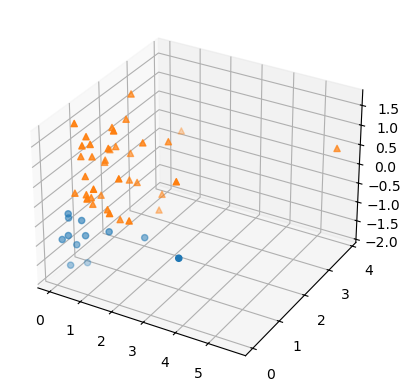

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vectors[0,labels==0], vectors[1,labels==0], vectors[2,labels==0],marker='o')
ax.scatter(vectors[0,labels==1], vectors[1,labels==1], vectors[2,labels==1],marker='^')


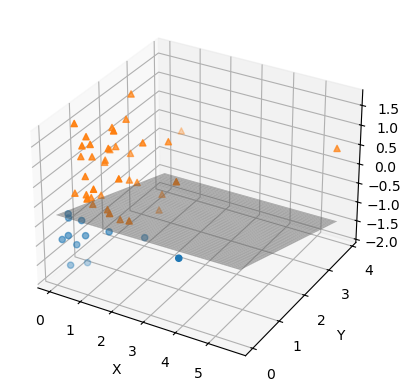

In [36]:
def plot_surface(coefficients, X):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[0,labels==0], X[1,labels==0], X[2,labels==0],marker='o')
    ax.scatter(X[0,labels==1], X[1,labels==1], X[2,labels==1],marker='^')

    # Plot the surface
    x_range = np.linspace(min(X[0]), max(X[0]), 100)
    y_range = np.linspace(min(X[1]), max(X[1]), 100)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

    Z_mesh = coefficients[0] * X_mesh + coefficients[1] * Y_mesh + coefficients[2]

    ax.plot_surface(X_mesh, Y_mesh, Z_mesh, alpha=0.5, color='gray',label='kozinec alg')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

plot_surface(separating_vector, vectors)